<a href="https://colab.research.google.com/github/ManojKumarTiwari/Tensorflow2AndKeras/blob/master/3_ImageClassification_2D_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content
- Overview
- Imports
- Load the Data
- Build CNN Model

# Overview
- We will be creating a 2D CNN to Multiclass Image Classification task
- Dataset: Cifar-10
- https://www.kaggle.com/c/cifar-10
- What you'll learn
- CNN Explain in simple words
- https://towardsdatascience.com/introduction-to-convolutional-neural-networks-cnn-with-tensorflow-57e2f4837e18
- CNN
- Convolutional layer
- Receptive field
- Padding
  - Same Convolution
  - Valid Convolution
- Stride
  - Strided Convolution
- Filters or Convolutional Kernals
- Feature Maps
- Pooling layer
  - Max Pooling
  - Average pooling

# Imports

In [1]:
# !pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 450kB 56.1MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=3ec1acd9e8d679c085cdaf0cc6c4606713d84178c68e2c738821dc969ead8a29
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc1 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc1 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0rc0
    Uninstalling tensorflow-estimator-2.2.0rc0:
      Successfully uninstalled tensorflow-estimator-2.2.0rc0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [2]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'2.1.0'

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [0]:
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.metrics import sparse_categorical_accuracy

In [0]:
from tensorflow.keras.datasets import cifar10

# Load the Data

In [0]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

In [0]:
class_names = ['airplane', 'automobile', 'bird',  'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [39]:
X_train.max()

255

In [0]:
X_train = X_train/255
X_test = X_test/255

In [41]:
X_train.shape

(50000, 32, 32, 3)

In [42]:
X_test.shape

(10000, 32, 32, 3)

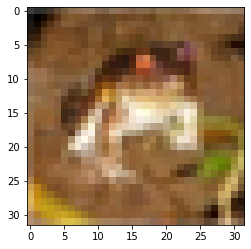

In [54]:
plt.imshow(X_train[0])

In [55]:
X_train.max()

1.0

In [46]:
y_train[1]

array([9], dtype=uint8)

# Build CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(7,7), strides=(1,1), padding='same', activation='relu', input_shape=[32,32,3]))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [58]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 64)        9472      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 256)        

In [0]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=[32,32,3]))

model1.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))
model1.add(Dropout(0.5))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(10, activation='softmax'))

In [62]:
model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_18 (Dense)             (None, 10)               

# Model Compilation

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [0]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Train the Model

In [60]:
history = model.fit(x=X_train, y=y_train, batch_size=10, epochs=10, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 21s 525us/sample - loss: 2.3031 - sparse_categorical_accuracy: 0.0996 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.0997
Epoch 2/10
40000/40000 [==============================] - 20s 512us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0984 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.0952
Epoch 3/10
40000/40000 [==============================] - 21s 515us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0971 - val_loss: 2.3028 - val_sparse_categorical_accuracy: 0.1003
Epoch 4/10
40000/40000 [==============================] - 21s 520us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0966 - val_loss: 2.3029 - val_sparse_categorical_accuracy: 0.0952
Epoch 5/10
40000/40000 [==============================] - 21s 513us/sample - loss: 2.3029 - sparse_categorical_accuracy: 0.0992 - val_loss: 2.3030 - val_sparse_categorical_accuracy: 0.0952
Epoch

In [65]:
history1 = model1.fit(x=X_train, y=y_train, batch_size=10, epochs=10, verbose=1, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 14s 355us/sample - loss: 1.4285 - sparse_categorical_accuracy: 0.4887 - val_loss: 1.2231 - val_sparse_categorical_accuracy: 0.5726
Epoch 2/10
40000/40000 [==============================] - 14s 344us/sample - loss: 1.1351 - sparse_categorical_accuracy: 0.5982 - val_loss: 1.0512 - val_sparse_categorical_accuracy: 0.6259
Epoch 3/10
40000/40000 [==============================] - 14s 349us/sample - loss: 1.0111 - sparse_categorical_accuracy: 0.6428 - val_loss: 1.0282 - val_sparse_categorical_accuracy: 0.6377
Epoch 4/10
40000/40000 [==============================] - 14s 344us/sample - loss: 0.9169 - sparse_categorical_accuracy: 0.6745 - val_loss: 0.9935 - val_sparse_categorical_accuracy: 0.6523
Epoch 5/10
40000/40000 [==============================] - 14s 345us/sample - loss: 0.8476 - sparse_categorical_accuracy: 0.6996 - val_loss: 0.9293 - val_sparse_categorical_accuracy: 0.6740
Epoch

# Plot learning Curves

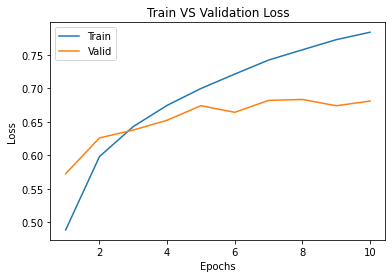

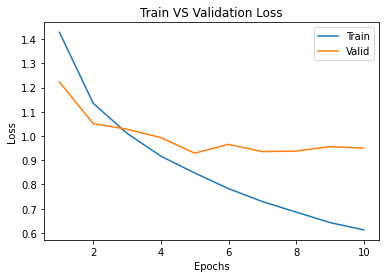

In [69]:
# Plot Training Loss vs Validation Accuracy
epochs = range(1,11)
plt.plot(epochs, history1.history['sparse_categorical_accuracy'])
plt.plot(epochs, history1.history['val_sparse_categorical_accuracy'])
plt.title("Train VS Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Valid'])
plt.show()

# Plot Training Loss vs Validation Loss
epochs = range(1,11)
plt.plot(epochs, history1.history['loss'])
plt.plot(epochs, history1.history['val_loss'])
plt.title("Train VS Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train','Valid'])
plt.show()

# Predict

In [0]:
y_pred = model1.predict_classes(X_test)

# Evaluate

In [0]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [0]:
conf_mat = confusion_matrix(y_test, y_pred)

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fbdbd0bd550>)

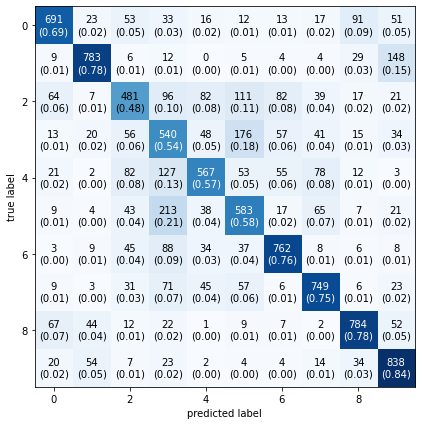

In [75]:
plot_confusion_matrix(conf_mat, figsize=(7,7), show_normed=True)